In [1]:
import os, shutil
import pandas_datareader as web
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
tickers = ["AMZN","FB","NFLX","TSLA"]

In [3]:
df = pd.DataFrame()
for t in tickers: 
    df[t] = web.get_data_yahoo(t,start = "1/1/2020")["Adj Close"]

In [4]:
df.head()

,AMZN,FB,NFLX,TSLA
Date,,,,
2020-01-02,1898.010010,209.779999,329.809998,86.052002
2020-01-03,1874.969971,208.669998,325.899994,88.601997
2020-01-06,1902.880005,212.600006,335.829987,90.307999
2020-01-07,1906.859985,213.059998,330.750000,93.811996
2020-01-08,1891.969971,215.220001,339.260010,98.428001


In [5]:
df.tail()

,AMZN,FB,NFLX,TSLA
Date,,,,
2020-11-10,3035.020020,272.429993,480.239990,410.359985
2020-11-11,3137.389893,276.480011,490.760010,417.130005
2020-11-12,3110.280029,275.079987,486.769989,411.760010
2020-11-13,3128.810059,276.950012,482.839996,408.500000
2020-11-16,3126.219971,277.809998,482.000000,407.725189


In [6]:
df.describe()

,AMZN,FB,NFLX,TSLA
count,222.000000,222.000000,222.000000,222.000000
mean,2611.164681,228.789235,438.395405,245.915149
std,547.123307,37.682710,65.404861,126.684372
min,1676.609985,146.009995,298.839996,72.244003
25%,2042.820007,207.510002,373.007500,146.080002
50%,2565.319946,231.394997,442.675003,190.965996
75%,3142.512512,261.344986,490.030006,387.977509
max,3531.449951,303.910004,556.549988,498.320007


In [7]:
returns = df.pct_change().dropna()

In [8]:
summary = df.describe()

In [9]:
summary = summary.T

In [10]:
rng = abs(summary["min"]) + abs(summary["max"])

In [11]:
abs(summary["min"]) + abs(summary["max"])

AMZN    5208.059937
FB       449.919998
NFLX     855.389984
TSLA     570.564011
dtype: float64

In [12]:
eq_weigh_ptfl = np.ones((4,1))/3

In [13]:
eq_weigh_ptfl

array([[0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333]])

In [14]:
variance_ptfl = np.dot(np.dot( eq_weigh_ptfl.T,df.cov().values),eq_weigh_ptfl)

In [15]:
variance_ptfl

array([[64727.53382404]])

In [16]:
std_ptfl = np.sqrt(variance_ptfl)

In [17]:
std_ptfl

array([[254.4160644]])

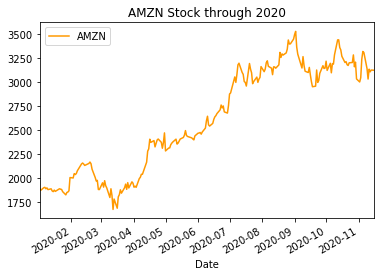

In [18]:
df["AMZN"].plot(title = "AMZN Stock through 2020",legend = True,color="#FF9900")

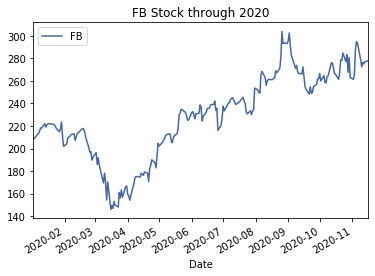

In [19]:
df["FB"].plot(title = "FB Stock through 2020",legend = True,color="#4267B2")

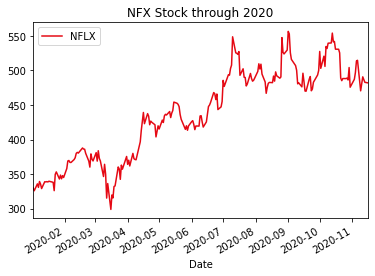

In [20]:
df["NFLX"].plot(title = "NFX Stock through 2020",legend = True,color="#E50914")

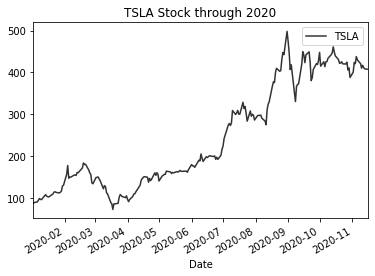

In [21]:
df["TSLA"].plot(title = "TSLA Stock through 2020",legend = True,color="#333333")

In [22]:
weights = np.random.random(len(tickers))

In [23]:
weights /= np.sum(weights)

In [24]:
weights

array([0.04484544, 0.23386162, 0.14184819, 0.57944475])

In [25]:
np.sum(weights * returns.mean()) *250

1.4759648261793228

In [26]:
ptfl_returns = []
ptfl_volatilities = []

for i in range(1000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    ptfl_returns.append(np.sum(weights * returns.mean()) * 250)
    ptfl_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))

In [27]:
portfolios = pd.DataFrame({"returns" : ptfl_returns,"volatility" : ptfl_volatilities})

In [28]:
portfolios

,returns,volatility
0,0.856036,0.466939
1,0.768487,0.417599
2,0.723515,0.436176
3,1.016068,0.500393
4,0.787348,0.419176
...,...,...
995,0.911720,0.470869
996,0.715021,0.411152
997,0.997021,0.460028
998,0.929760,0.454175


In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


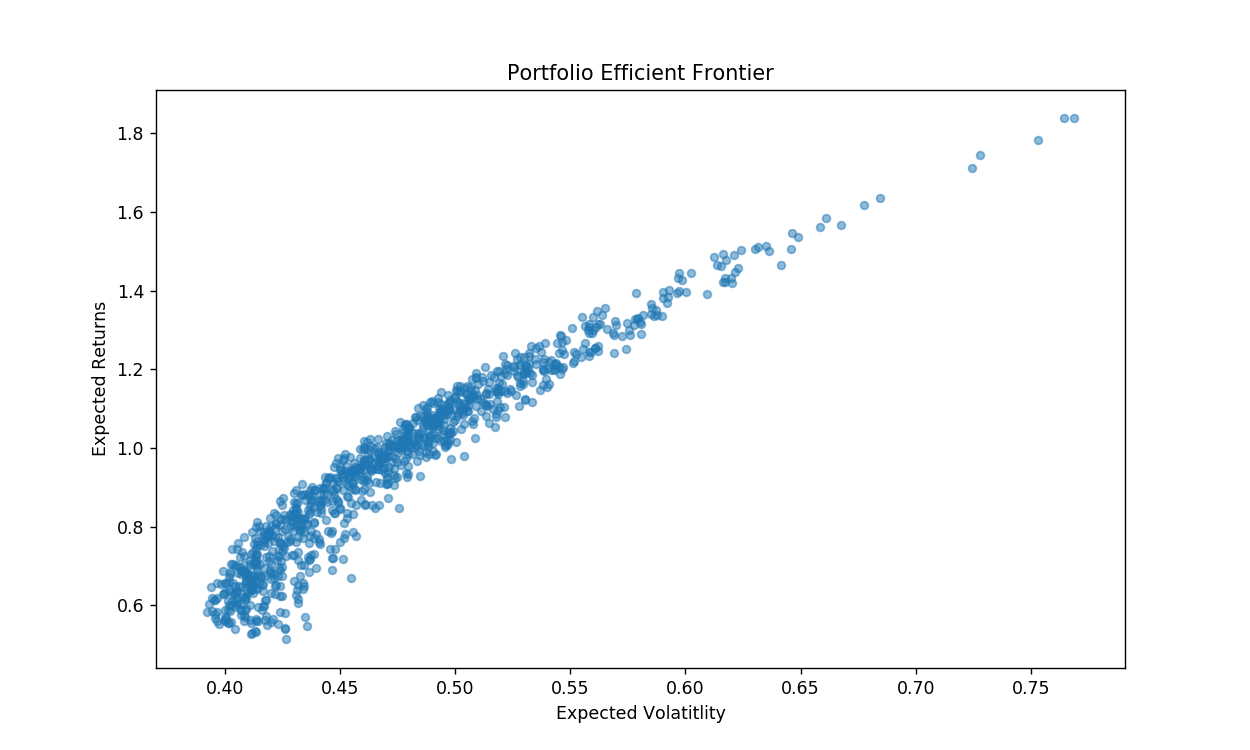

Text(0.5, 1.0, 'Portfolio Efficient Frontier')

In [30]:
portfolios.plot(kind = "scatter",x = "volatility", y = "returns", figsize = (10,6),alpha = 0.5)
plt.xlabel("Expected Volatitlity")
plt.ylabel("Expected Returns")
plt.title("Portfolio Efficient Frontier")